# INTRODUCTION TO EDA

In [1]:
import pandas as pd
import numpy as np
# from pandas import Series , DataFrame

In [5]:
series1 = pd.Series(['Bangalore','Chennai','Hyderabad','Mumbai']) #we have used a list to create a series.
series1

0    Bangalore
1      Chennai
2    Hyderabad
3       Mumbai
dtype: object

In [6]:
series1[0]

'Bangalore'

In [7]:
ser1 = pd.Series([5,10,15],index=['a','b','c'])
ser1

a     5
b    10
c    15
dtype: int64

In [8]:
data = pd.DataFrame({'price':[95,25,85,41,78],'ticker':['AXP','CSCO','DIS','MSFT','WMT'],
                  'company':['American Express','Cisco','Walt Disney','Microsoft','Walmart']})
data

,price,ticker,company
0,95,AXP,American Express
1,25,CSCO,Cisco
2,85,DIS,Walt Disney
3,41,MSFT,Microsoft
4,78,WMT,Walmart


In [9]:
data["price"]

0    95
1    25
2    85
3    41
4    78
Name: price, dtype: int64

In [10]:
data['company']

0    American Express
1               Cisco
2         Walt Disney
3           Microsoft
4             Walmart
Name: company, dtype: object

In [11]:
data.company

0    American Express
1               Cisco
2         Walt Disney
3           Microsoft
4             Walmart
Name: company, dtype: object

### FILL MISSING VALUE

Reindex Function
#### How to fill a missing value with some value in the data frame?

In [84]:
subjects = ['English','Language','Maths','Science','Social']
student1 = pd.Series({'English':80,'Language':45,'Maths':99,'Social':56})
student2 = pd.Series({'Language':77,'Maths':69,'Social':55})
student3 = pd.Series({'English':44,'Language':48,'Maths':68,'Social':65})
student4 = pd.Series({'English':67,'Language':51,'Social':79})
student5 = pd.Series({'English':88,'Language':63,'Science':69,'Maths':83})
student6 = pd.Series({'Language':48,'Maths':80,'Science':56,'Social':73})
student7 = pd.Series({'English':82,'Maths':90,'Science':88,'Social':91})
pf = pd.DataFrame(columns=['Student1','Student2','Student3','Student4','Student5','Student6','Student7'],index=subjects)
pf.Student1 = student1
pf.Student2 = student2
pf.Student3 = student3
pf.Student4 = student4
pf.Student5 = student5
pf.Student6 = student6
pf.Student7 = student7
pf


,Student1,Student2,Student3,Student4,Student5,Student6,Student7
English,80.0,NaN,44.0,67.0,88.0,NaN,82.0
Language,45.0,77.0,48.0,51.0,63.0,48.0,NaN
Maths,99.0,69.0,68.0,NaN,83.0,80.0,90.0
Science,NaN,NaN,NaN,NaN,69.0,56.0,88.0
Social,56.0,55.0,65.0,79.0,NaN,73.0,91.0


In [13]:
pf.reindex(['Craft','English','Language','Maths','Science','Social','Training'])


,Student1,Student2,Student3,Student4,Student5,Student6,Student7
Craft,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English,80.0,NaN,44.0,67.0,88.0,NaN,82.0
Language,45.0,77.0,48.0,51.0,63.0,48.0,NaN
Maths,99.0,69.0,68.0,NaN,83.0,80.0,90.0
Science,NaN,NaN,NaN,NaN,69.0,56.0,88.0
Social,56.0,55.0,65.0,79.0,NaN,73.0,91.0
Training,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
pf.reindex(['English','Language','Maths','Science','Social','Training','Craft',], fill_value = 78)

,Student1,Student2,Student3,Student4,Student5,Student6,Student7
English,80.0,NaN,44.0,67.0,88.0,NaN,82.0
Language,45.0,77.0,48.0,51.0,63.0,48.0,NaN
Maths,99.0,69.0,68.0,NaN,83.0,80.0,90.0
Science,NaN,NaN,NaN,NaN,69.0,56.0,88.0
Social,56.0,55.0,65.0,79.0,NaN,73.0,91.0
Training,78.0,78.0,78.0,78.0,78.0,78.0,78.0
Craft,78.0,78.0,78.0,78.0,78.0,78.0,78.0


#### How to fill the missing value with the previous value?

In [23]:
pf.reindex(['Craft','English','Language','Maths','Science','Social','Training'], method='ffill')


,Student1,Student2,Student3,Student4,Student5,Student6,Student7
Craft,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English,80.0,NaN,44.0,67.0,88.0,NaN,82.0
Language,45.0,77.0,48.0,51.0,63.0,48.0,NaN
Maths,99.0,69.0,68.0,NaN,83.0,80.0,90.0
Science,NaN,NaN,NaN,NaN,69.0,56.0,88.0
Social,56.0,55.0,65.0,79.0,NaN,73.0,91.0
Training,56.0,55.0,65.0,79.0,NaN,73.0,91.0


#### How to fill the missing value backwards?

In [24]:
reindexdf4 = pf.reindex(['Craft','English','Language','Maths','Science','Social','Training'],
                         method='bfill')
reindexdf4

,Student1,Student2,Student3,Student4,Student5,Student6,Student7
Craft,80.0,NaN,44.0,67.0,88.0,NaN,82.0
English,80.0,NaN,44.0,67.0,88.0,NaN,82.0
Language,45.0,77.0,48.0,51.0,63.0,48.0,NaN
Maths,99.0,69.0,68.0,NaN,83.0,80.0,90.0
Science,NaN,NaN,NaN,NaN,69.0,56.0,88.0
Social,56.0,55.0,65.0,79.0,NaN,73.0,91.0
Training,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DROPPING DUPLICATED VALUES

#### Drop the duplicate row of a dataframe

In [29]:
dataa = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],
      
    'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
 
df = pd.DataFrame(dataa,columns=['Name','Age','Score'])
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [33]:
df.duplicated() # checking row duplications

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11     True
dtype: bool

In [34]:
df.duplicated(['Age']) #check for specific column duplications

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
dtype: bool

In [36]:
df.drop_duplicates(["Age"])

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74


In [37]:
df.drop_duplicates()

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


#### Drop the duplicate by retaining last occurrence

In [39]:
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [41]:
df.drop_duplicates(keep='last')

,Name,Age,Score
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89
11,Cathrine,24,77


#### Drop the duplicate by column

In [33]:
df.drop_duplicates(['Age'], keep='last')

,Name,Age,Score
6,Alisa,26,85
8,kumar,22,42
9,Alisa,23,62
11,Cathrine,24,77


#### Simply drop a row or observation

### DROP ROW / COLUMN

In [34]:
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


#### Drop rows or observations 

In [45]:
df.drop([1])

,Name,Age,Score
0,Alisa,26,85
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


In [46]:
df.drop([2,10])

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62
11,Cathrine,24,77


#### Drop rows or observations by condition

In [47]:
df[df["Age"] != 23]

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
3,jack,22,74
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
10,Alex,24,89
11,Cathrine,24,77


In [36]:
df[df.Name != 'Alisa']

,Name,Age,Score
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
7,Bobby,24,63
8,kumar,22,42
10,Alex,24,89
11,Cathrine,24,77


#### Drop a row or observation by index

In [53]:
df.drop([2])

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


In [37]:
df.drop(df.index[2])

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


#### Drop a row by position

In [58]:
df[2:-1]

,Name,Age,Score
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


In [38]:
df[:-3]

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42


#### Drop a column by name

In [63]:
df.drop(["Age"], axis=1)

,Name,Score
0,Alisa,85
1,Bobby,63
2,jodha,55
3,jack,74
4,raghu,31
5,Cathrine,77
6,Alisa,85
7,Bobby,63
8,kumar,42
9,Alisa,62


In [39]:
df.drop('Age',axis=1)

,Name,Score
0,Alisa,85
1,Bobby,63
2,jodha,55
3,jack,74
4,raghu,31
5,Cathrine,77
6,Alisa,85
7,Bobby,63
8,kumar,42
9,Alisa,62


In [41]:
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


#### Drop a column based on column index

In [77]:
df.drop(df.columns[0], axis=1 )

,Score
0,85
1,63
2,55
3,74
4,31
5,77
6,85
7,63
8,42
9,62


In [78]:
df.drop(df.columns[0],axis=1)

,Score
0,85
1,63
2,55
3,74
4,31
5,77
6,85
7,63
8,42
9,62


In [81]:
df

,Name,Score
0,Alisa,85
1,Bobby,63
2,jodha,55
3,jack,74
4,raghu,31
5,Cathrine,77
6,Alisa,85
7,Bobby,63
8,kumar,42
9,Alisa,62


#### Delete a column based on column name

In [75]:
del df['Age']

KeyError: 'Age'

In [80]:
df

,Name,Score
0,Alisa,85
1,Bobby,63
2,jodha,55
3,jack,74
4,raghu,31
5,Cathrine,77
6,Alisa,85
7,Bobby,63
8,kumar,42
9,Alisa,62


### SORTING

In [142]:
d = {'Name':pd.Series(['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa']),
   'Age':pd.Series([26,27,25,24,31,27,25,33,42,32,51,47]),
   'Score':pd.Series([89,87,67,55,47,72,76,79,44,92,99,69])}

df2 = pd.DataFrame(d)
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


#### Sorting by column

In [90]:
df2.sort_values(['Score'])

,Name,Age,Score
8,David,42,44
4,Rocky,31,47
3,Madonna,24,55
2,Cathrine,25,67
11,Teresa,47,69
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
1,Bobby,27,87
0,Alisa,26,89


#### Sorting by column in descending order

In [143]:
df2.sort_values(['Score'],ascending=0)

,Name,Age,Score
10,Ajay,51,99
9,Andrew,32,92
0,Alisa,26,89
1,Bobby,27,87
7,Rahul,33,79
6,Jaqluine,25,76
5,Sebastian,27,72
11,Teresa,47,69
2,Cathrine,25,67
3,Madonna,24,55


In [89]:
df2.sort_values(["Age"])

,Name,Age,Score
3,Madonna,24,55
2,Cathrine,25,67
6,Jaqluine,25,76
0,Alisa,26,89
1,Bobby,27,87
5,Sebastian,27,72
4,Rocky,31,47
9,Andrew,32,92
7,Rahul,33,79
8,David,42,44


In [91]:
df3 = df2.sort_values(['Age','Score'],ascending=[False,True])
df3

,Name,Age,Score
10,Ajay,51,99
11,Teresa,47,69
8,David,42,44
7,Rahul,33,79
9,Andrew,32,92
4,Rocky,31,47
5,Sebastian,27,72
1,Bobby,27,87
0,Alisa,26,89
2,Cathrine,25,67


#### Sorting by index

In [93]:
df3.sort_index(ascending=False)

,Name,Age,Score
11,Teresa,47,69
10,Ajay,51,99
9,Andrew,32,92
8,David,42,44
7,Rahul,33,79
6,Jaqluine,25,76
5,Sebastian,27,72
4,Rocky,31,47
3,Madonna,24,55
2,Cathrine,25,67


### RANKING

In [165]:
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
   'Score':[62,47,55,74,31,77,85,63,42,67,89,89],
'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],}
 
df4 = pd.DataFrame(d,columns=['Name','Score',"Subject"])
df4


,Name,Score,Subject
0,Alisa,62,Mathematics
1,Bobby,47,Mathematics
2,Cathrine,55,Mathematics
3,Alisa,74,Science
4,Bobby,31,Science
5,Cathrine,77,Science
6,Alisa,85,Mathematics
7,Bobby,63,Mathematics
8,Cathrine,42,Mathematics
9,Alisa,67,Science


#### Ranking in ascending order

In [345]:
df4['order']=df4['Score'].rank()
df4.sort_values(["Score"])

,Name,Score,Subject,order,score_ranked,Rank_min,Score_max,Score_Dense
4,Bobby,31,Science,1.0,12.0,12.0,12.0,11.0
8,Cathrine,42,Mathematics,2.0,11.0,11.0,11.0,10.0
1,Bobby,47,Mathematics,3.0,10.0,10.0,10.0,9.0
2,Cathrine,55,Mathematics,4.0,9.0,9.0,9.0,8.0
0,Alisa,62,Mathematics,5.0,8.0,8.0,8.0,7.0
7,Bobby,63,Mathematics,6.0,7.0,7.0,7.0,6.0
9,Alisa,67,Science,7.0,6.0,6.0,6.0,5.0
3,Alisa,74,Science,8.0,5.0,5.0,5.0,4.0
5,Cathrine,77,Science,9.0,4.0,4.0,4.0,3.0
6,Alisa,85,Mathematics,10.0,3.0,3.0,3.0,2.0


In [167]:
df4

,Name,Score,Subject,order
0,Alisa,62,Mathematics,5.0
1,Bobby,47,Mathematics,3.0
2,Cathrine,55,Mathematics,4.0
3,Alisa,74,Science,8.0
4,Bobby,31,Science,1.0
5,Cathrine,77,Science,9.0
6,Alisa,85,Mathematics,10.0
7,Bobby,63,Mathematics,6.0
8,Cathrine,42,Mathematics,2.0
9,Alisa,67,Science,7.0


#### Ranking in descending order

In [343]:
df4['score_ranked']=df4['Score'].rank(ascending=0)
df4.sort_values(["Score"])

,Name,Score,Subject,order,score_ranked,Rank_min,Score_max,Score_Dense
4,Bobby,31,Science,1.0,12.0,12.0,12.0,11.0
8,Cathrine,42,Mathematics,2.0,11.0,11.0,11.0,10.0
1,Bobby,47,Mathematics,3.0,10.0,10.0,10.0,9.0
2,Cathrine,55,Mathematics,4.0,9.0,9.0,9.0,8.0
0,Alisa,62,Mathematics,5.0,8.0,8.0,8.0,7.0
7,Bobby,63,Mathematics,6.0,7.0,7.0,7.0,6.0
9,Alisa,67,Science,7.0,6.0,6.0,6.0,5.0
3,Alisa,74,Science,8.0,5.0,5.0,5.0,4.0
5,Cathrine,77,Science,9.0,4.0,4.0,4.0,3.0
6,Alisa,85,Mathematics,10.0,3.0,3.0,3.0,2.0


#### Ranking by minimum value

In [169]:
df4['Rank_min']=df4['Score'].rank(ascending=0,method='min')
df4.sort_values(["Rank_min"])

,Name,Score,Subject,order,score_ranked,Rank_min
10,Bobby,89,Science,11.5,1.5,1.0
11,Cathrine,89,Science,11.5,1.5,1.0
6,Alisa,85,Mathematics,10.0,3.0,3.0
5,Cathrine,77,Science,9.0,4.0,4.0
3,Alisa,74,Science,8.0,5.0,5.0
9,Alisa,67,Science,7.0,6.0,6.0
7,Bobby,63,Mathematics,6.0,7.0,7.0
0,Alisa,62,Mathematics,5.0,8.0,8.0
2,Cathrine,55,Mathematics,4.0,9.0,9.0
1,Bobby,47,Mathematics,3.0,10.0,10.0


#### Ranking by maximum value

In [171]:
df4['Score_max']=df4['Score'].rank(ascending=0,method='max')
df4.sort_values(["Rank_min"])

,Name,Score,Subject,order,score_ranked,Rank_min,Score_max
10,Bobby,89,Science,11.5,1.5,1.0,2.0
11,Cathrine,89,Science,11.5,1.5,1.0,2.0
6,Alisa,85,Mathematics,10.0,3.0,3.0,3.0
5,Cathrine,77,Science,9.0,4.0,4.0,4.0
3,Alisa,74,Science,8.0,5.0,5.0,5.0
9,Alisa,67,Science,7.0,6.0,6.0,6.0
7,Bobby,63,Mathematics,6.0,7.0,7.0,7.0
0,Alisa,62,Mathematics,5.0,8.0,8.0,8.0
2,Cathrine,55,Mathematics,4.0,9.0,9.0,9.0
1,Bobby,47,Mathematics,3.0,10.0,10.0,10.0


### DENSE RANK

In [172]:
df4['Score_Dense']=df4['Score'].rank(ascending=0,method='dense')
df4.sort_values(["Rank_min"])

,Name,Score,Subject,order,score_ranked,Rank_min,Score_max,Score_Dense
10,Bobby,89,Science,11.5,1.5,1.0,2.0,1.0
11,Cathrine,89,Science,11.5,1.5,1.0,2.0,1.0
6,Alisa,85,Mathematics,10.0,3.0,3.0,3.0,2.0
5,Cathrine,77,Science,9.0,4.0,4.0,4.0,3.0
3,Alisa,74,Science,8.0,5.0,5.0,5.0,4.0
9,Alisa,67,Science,7.0,6.0,6.0,6.0,5.0
7,Bobby,63,Mathematics,6.0,7.0,7.0,7.0,6.0
0,Alisa,62,Mathematics,5.0,8.0,8.0,8.0,7.0
2,Cathrine,55,Mathematics,4.0,9.0,9.0,9.0,8.0
1,Bobby,47,Mathematics,3.0,10.0,10.0,10.0,9.0


### HIERARCHICAL INDEXING OR MULTIPLE INDEXING

In [173]:
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1',
            'Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
     
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],
   'Score':[62,47,55,74,31,77,85,63,42,67,89,81]}
 
df5 = pd.DataFrame(d,columns=['Name','Exam','Subject','Score'])
df5

,Name,Exam,Subject,Score
0,Alisa,Semester 1,Mathematics,62
1,Bobby,Semester 1,Mathematics,47
2,Cathrine,Semester 1,Mathematics,55
3,Alisa,Semester 1,Science,74
4,Bobby,Semester 1,Science,31
5,Cathrine,Semester 1,Science,77
6,Alisa,Semester 2,Mathematics,85
7,Bobby,Semester 2,Mathematics,63
8,Cathrine,Semester 2,Mathematics,42
9,Alisa,Semester 2,Science,67


In [346]:
k=df5.set_index(['Name', 'Exam'])
k.sort_index(level=0)

Subject  Score
Name     Exam                          
Alisa    Semester 1  Mathematics     62
         Semester 1      Science     74
         Semester 2  Mathematics     85
         Semester 2      Science     67
Bobby    Semester 1  Mathematics     47
         Semester 1      Science     31
         Semester 2  Mathematics     63
         Semester 2      Science     89
Cathrine Semester 1  Mathematics     55
         Semester 1      Science     77
         Semester 2  Mathematics     42
         Semester 2      Science     81

In [177]:
df6=df5.set_index(['Exam', 'Subject'])
df6

Name  Score
Exam       Subject                     
Semester 1 Mathematics     Alisa     62
           Mathematics     Bobby     47
           Mathematics  Cathrine     55
           Science         Alisa     74
           Science         Bobby     31
           Science      Cathrine     77
Semester 2 Mathematics     Alisa     85
           Mathematics     Bobby     63
           Mathematics  Cathrine     42
           Science         Alisa     67
           Science         Bobby     89
           Science      Cathrine     81

In [178]:
df6.index

MultiIndex([('Semester 1', 'Mathematics'),
            ('Semester 1', 'Mathematics'),
            ('Semester 1', 'Mathematics'),
            ('Semester 1',     'Science'),
            ('Semester 1',     'Science'),
            ('Semester 1',     'Science'),
            ('Semester 2', 'Mathematics'),
            ('Semester 2', 'Mathematics'),
            ('Semester 2', 'Mathematics'),
            ('Semester 2',     'Science'),
            ('Semester 2',     'Science'),
            ('Semester 2',     'Science')],
           names=['Exam', 'Subject'])

### Swap the column in hierarchical index

In [125]:
df = df6.swaplevel('Subject','Exam')
df

Name  Score
Subject     Exam                       
Mathematics Semester 1     Alisa     62
            Semester 1     Bobby     47
            Semester 1  Cathrine     55
Science     Semester 1     Alisa     74
            Semester 1     Bobby     31
            Semester 1  Cathrine     77
Mathematics Semester 2     Alisa     85
            Semester 2     Bobby     63
            Semester 2  Cathrine     42
Science     Semester 2     Alisa     67
            Semester 2     Bobby     89
            Semester 2  Cathrine     81

### Sorting Index 

In [126]:
df.sort_index(level=0)

Name  Score
Subject     Exam                       
Mathematics Semester 1     Alisa     62
            Semester 1     Bobby     47
            Semester 1  Cathrine     55
            Semester 2     Alisa     85
            Semester 2     Bobby     63
            Semester 2  Cathrine     42
Science     Semester 1     Alisa     74
            Semester 1     Bobby     31
            Semester 1  Cathrine     77
            Semester 2     Alisa     67
            Semester 2     Bobby     89
            Semester 2  Cathrine     81

### MAPPING

In [181]:
df1 = pd.DataFrame({'Names':['Aniket','Aniruddha','Abhay'],'Weight':[50,170,90]})
df1

,Names,Weight
0,Aniket,50
1,Aniruddha,170
2,Abhay,90


In [182]:
height = {'Aniruddha':6,'Aniket':4,'Abhay':5}
height

{'Aniruddha': 6, 'Aniket': 4, 'Abhay': 5}

In [183]:
df1['Height']=df1['Names'].map(height)

In [184]:
df1

,Names,Weight,Height
0,Aniket,50,4
1,Aniruddha,170,6
2,Abhay,90,5


### REPLACING

In [185]:
df1

,Names,Weight,Height
0,Aniket,50,4
1,Aniruddha,170,6
2,Abhay,90,5


In [137]:
df1['Weight']=df1['Weight'].replace({170:70})
df1

,Names,Weight,Height
0,Aniket,50,4
1,Aniruddha,70,6
2,Abhay,90,5


### RENAMING

In [138]:
df1

,Names,Weight,Height
0,Aniket,50,4
1,Aniruddha,70,6
2,Abhay,90,5


In [200]:
df0 = df1.rename(columns={'Names':'Naav','Weight':'vajan'})

In [201]:
df0

,naav,vajan,Height
0,Aniket,50,4
1,Aniruddha,170,6
2,Abhay,90,5


### SUMMARY STATISTICS

In [141]:
data = pd.read_csv("wine.csv", encoding="latin-1")
data.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'wine.csv'

#### Summary statistics of the numeric columns

In [ ]:
data.describe()

#### Summary statistics of all the columns

In [ ]:
data.describe(include='all')

#### Basic information on data

In [ ]:
data.info()

### Measure of Central Tendency.

#### Let's Calculate mean of the Data

In [202]:
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa'],
   'Score1':[62,47,55,74,31,77,85,63,42,32,71,57],
   'Score2':[89,87,67,55,47,72,76,79,44,92,99,69]}

df = pd.DataFrame(d)
df

,Name,Score1,Score2
0,Alisa,62,89
1,Bobby,47,87
2,Cathrine,55,67
3,Madonna,74,55
4,Rocky,31,47
5,Sebastian,77,72
6,Jaqluine,85,76
7,Rahul,63,79
8,David,42,44
9,Andrew,32,92


In [203]:
df.mean()

Score1    58.0
Score2    73.0
dtype: float64

#### Row Mean

In [204]:
df.mean(axis=1)

0     75.5
1     67.0
2     61.0
3     64.5
4     39.0
5     74.5
6     80.5
7     71.0
8     43.0
9     62.0
10    85.0
11    63.0
dtype: float64

#### Column Mean

In [205]:
df.mean(axis=0)

Score1    58.0
Score2    73.0
dtype: float64

#### Mean of the specific column

In [206]:
df['Score1'].mean()

58.0

In [207]:
df.loc[4:10,"Score1"].mean()

57.285714285714285

### Let's Calculate median of the Data

In [12]:
df1 = df

In [9]:
import statistics

In [10]:
print(statistics.median([1,9,5,6,8,7]))
print(statistics.median([4,-11,-5,16,5,7,9]))

6.5
5


In [14]:
df1

,Name,Score1,Score2
0,Alisa,62,89
1,Bobby,47,87
2,Cathrine,55,67
3,Madonna,74,55
4,Rocky,31,47
5,Sebastian,77,72
6,Jaqluine,85,76
7,Rahul,63,79
8,David,42,44
9,Andrew,32,92


In [15]:
df1.median()

Score1    59.5
Score2    74.0
dtype: float64

#### Column Median of the dataframe:

In [16]:
df1.median(axis=0)

Score1    59.5
Score2    74.0
dtype: float64

#### Median of the specific Column

In [17]:
df1.loc[:,"Score1"].median()

59.5

### Let's Calculate Mode of the Data

In [230]:
import statistics

In [19]:
print(statistics.mode([1,5,5,7,5,6,8,7]))
print(statistics.mode(['lion', 'cat', 'cat','dog','tiger']))

5
cat


### Mode of a dataframe

In [208]:
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa'],
   'Score1':[62,47,55,74,47,77,85,63,42,32,71,57],
   'Score2':[89,87,67,55,47,72,76,79,44,67,99,69],
   'Score3':[56,86,77,45,73,62,74,89,71,67,97,68]}

df2 = pd.DataFrame(d)
df2

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,47,47,73
5,Sebastian,77,72,62
6,Jaqluine,85,76,74
7,Rahul,63,79,89
8,David,42,44,71
9,Andrew,32,67,67


In [209]:
df2.mode()

,Name,Score1,Score2,Score3
0,Ajay,47.0,67.0,45
1,Alisa,NaN,NaN,56
2,Andrew,NaN,NaN,62
3,Bobby,NaN,NaN,67
4,Cathrine,NaN,NaN,68
5,David,NaN,NaN,71
6,Jaqluine,NaN,NaN,73
7,Madonna,NaN,NaN,74
8,Rahul,NaN,NaN,77
9,Rocky,NaN,NaN,86


#### Row Mode

In [210]:
df2.mode(axis=1)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\algorithms.py:846: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")
C:\Users\user\anaconda3\lib\site-packages\pandas\core\algorithms.py:846: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")


,0,1,2,3
0,Alisa,89,62,56
1,Bobby,47,86,87
2,Cathrine,67,77,55
3,74,45,Madonna,55
4,47,NaN,NaN,NaN
5,72,Sebastian,77,62
6,74,76,85,Jaqluine
7,89,Rahul,63,79
8,42,44,David,71
9,67,NaN,NaN,NaN


#### Column Mode

In [23]:
df2.mode(axis=0)

,Name,Score1,Score2,Score3
0,Ajay,47.0,67.0,45
1,Alisa,NaN,NaN,56
2,Andrew,NaN,NaN,62
3,Bobby,NaN,NaN,67
4,Cathrine,NaN,NaN,68
5,David,NaN,NaN,71
6,Jaqluine,NaN,NaN,73
7,Madonna,NaN,NaN,74
8,Rahul,NaN,NaN,77
9,Rocky,NaN,NaN,86


#### Mode of the specific Column

In [24]:
df2.loc[:,"Score1"].mode()

0    47
dtype: int64

### ZSCORE

In [226]:
from scipy.stats import zscore

In [233]:
a= [1, 2, 3]
m=statistics.mean(a)
m


2

In [234]:
np.std(a)

0.816496580927726

In [214]:
zscore([1, 2, 3])

array([-1.22474487,  0.        ,  1.22474487])

In [347]:
zscore([[1, 2, 3],[6, 7, 8]], axis=0)

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

### STANDARD DEVIATION

#### Simple Standard deviation Function in Python

In [216]:
import numpy as np
 
print(np.std([1,9,5,6,8,7]))
print(np.std([4,-11,-5,16,5,7,9]))

2.581988897471611
8.312763729129232


#### Standard deviation of a dataframe

In [235]:
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa'],
   'Score1':[62,47,55,74,31,77,85,63,42,32,71,57],
   'Score2':[89,87,67,55,47,72,76,79,44,92,99,69],
   'Score3':[56,86,77,45,73,62,74,89,71,67,97,68]}
 
df3 = pd.DataFrame(d)
df3

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqluine,85,76,74
7,Rahul,63,79,89
8,David,42,44,71
9,Andrew,32,92,67


In [236]:
df3.mean()

Score1    58.000000
Score2    73.000000
Score3    72.083333
dtype: float64

In [237]:
df3.std()

Score1    17.446021
Score2    17.653225
Score3    14.355603
dtype: float64

#### Row standard deviation

In [238]:
df3.std(axis=1)

0     17.578396
1     22.810816
2     11.015141
3     14.730920
4     21.197484
5      7.637626
6      5.859465
7     13.114877
8     16.196707
9     30.138569
10    15.620499
11     6.658328
dtype: float64

#### Column Standard deviation

In [239]:
df3.std(axis=0)

Score1    17.446021
Score2    17.653225
Score3    14.355603
dtype: float64

#### standard deviation of the specific Column

In [240]:
df3.loc[:,"Score1"].std()

17.446020645512156

### COEFFICIENT OF CORRELATION

In [241]:
df3.corr()

,Score1,Score2,Score3
Score1,1.000000,0.220204,-0.097280
Score2,0.220204,1.000000,0.390293
Score3,-0.097280,0.390293,1.000000


### SKEWNESS AND KURTOSIS

Skewness - Measure of the asymmetry in the distribution (either to the left or to the right).

S = Negative indicates data are skewed left.

S = Positive indicates data are skewed right.

S = 0 indicates data are normally distributed.

Kurtosis - Measure of the relative peakedness of a distribution.

K = 3 indicates a normal “bellshaped” distribution (mesokurtic).

K < 3 indicates a platykurtic distribution (flatter than a normal distribution with shorter tails).

K > 3 indicates a leptokurtic distribution (more peaked than a normal distribution with longer tails).



In [224]:
df3.skew()

Score1   -0.199078
Score2   -0.328380
Score3   -0.078164
dtype: float64

In [225]:
df3.kurtosis()

Score1   -0.928304
Score2   -0.847635
Score3    0.128366
dtype: float64

### VISUALIZATION : SEABORN AND MATPLOTLIB

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Lets create a small data using numpy array

In [246]:
import numpy as np
x = np.linspace(0, 6, 11)
y = x ** 2

In [247]:
x

array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ])

In [248]:
y

array([ 0.  ,  0.36,  1.44,  3.24,  5.76,  9.  , 12.96, 17.64, 23.04,
       29.16, 36.  ])

### LINE PLOT

In [ ]:
plt.plot(x, y) 
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

### HISTOGRAM

In [212]:
from random import sample
data = sample(range(1, 1000), 100)
data


[794,
 237,
 75,
 96,
 55,
 232,
 112,
 721,
 402,
 104,
 597,
 966,
 300,
 761,
 52,
 126,
 790,
 778,
 316,
 322,
 990,
 645,
 575,
 725,
 577,
 629,
 659,
 525,
 707,
 435,
 571,
 973,
 122,
 495,
 236,
 743,
 633,
 92,
 637,
 671,
 986,
 875,
 866,
 342,
 116,
 888,
 344,
 184,
 762,
 278,
 897,
 467,
 547,
 348,
 727,
 848,
 121,
 360,
 31,
 430,
 257,
 204,
 984,
 749,
 563,
 168,
 142,
 483,
 442,
 197,
 472,
 85,
 649,
 93,
 506,
 20,
 994,
 537,
 556,
 920,
 682,
 317,
 703,
 615,
 465,
 904,
 864,
 49,
 45,
 769,
 807,
 688,
 640,
 447,
 166,
 411,
 365,
 693,
 40,
 246]

(array([15.,  9.,  7.,  9., 11.,  9., 12., 13.,  6.,  9.]),
 array([ 20. , 117.4, 214.8, 312.2, 409.6, 507. , 604.4, 701.8, 799.2,
        896.6, 994. ]),
 <a list of 10 Patch objects>)

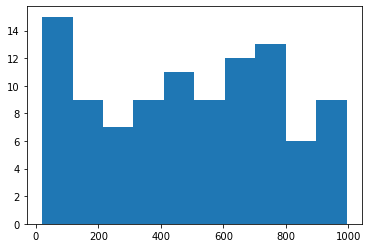

In [249]:
plt.hist(data)

(array([15.,  9.,  7.,  9., 11.,  9., 12., 13.,  6.,  9.]),
 array([ 20. , 117.4, 214.8, 312.2, 409.6, 507. , 604.4, 701.8, 799.2,
        896.6, 994. ]),
 <a list of 10 Patch objects>)

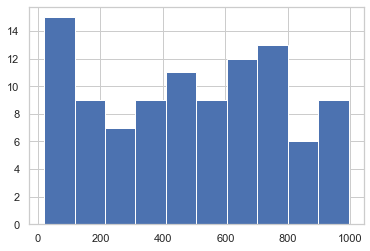

In [250]:
# Plot with a whitegrid style
sns.set()
sns.set_style('whitegrid')
plt.hist(data)

#### Lets plot the same histogram with a default seaborn style

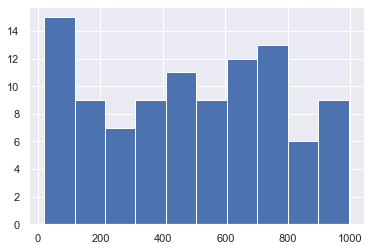

<Figure size 432x288 with 0 Axes>

In [251]:
sns.set()
plt.hist(data)
plt.show()
plt.clf()

### BOX PLOT

In [ ]:
sns.boxplot(data=data)
plt.show()
plt.clf()

### SCATTER PLOT

In [ ]:
plt.scatter(x,y)

### CASE STUDY

#### House Prices Analysis

Objective of the study is to perform EDA for the variables which will help later to build model later to predict the area which might get affected.

#### Invoke libraries

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [243]:
df_train = pd.read_csv('house_train.csv')

In [244]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [252]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [253]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [254]:
df_train.shape

(1460, 81)

In [256]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [255]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Histogram of SalePrice

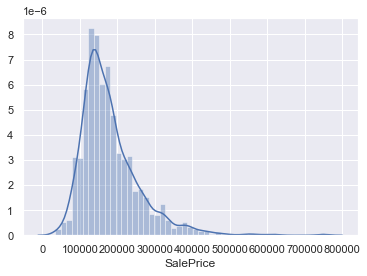

In [258]:
sns.distplot(df_train['SalePrice']);

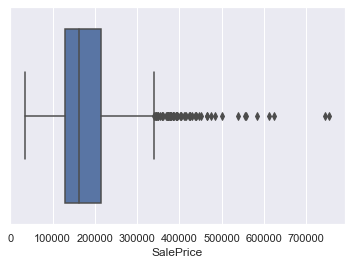

In [275]:
sns.boxplot(df_train['SalePrice'])

In [268]:
pp=df_train.corr()["SalePrice"]
pp

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

#### Skewness and Kurtosis of SalePrice

In [332]:
print("Skewness: ", df_train['SalePrice'].skew())
print("Kurtosis: " , df_train['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


# ZSCORE OUTLIER METHOD

In [277]:
from scipy.stats import zscore

In [333]:
zscore(df_train['SalePrice'])

array([ 0.34727322,  0.00728832,  0.53615372, ...,  1.07761115,
       -0.48852299, -0.42084081])

In [282]:
z=np.abs(zscore(df_train['SalePrice']))
z

array([0.34727322, 0.00728832, 0.53615372, ..., 1.07761115, 0.48852299,
       0.42084081])

In [296]:
threshold=3
np.where (z >3) #shows the indexes of the values > 3


(array([  58,  178,  185,  349,  389,  440,  473,  496,  527,  591,  664,
         691,  769,  798,  803,  898, 1046, 1142, 1169, 1182, 1243, 1373],
       dtype=int64),)

In [290]:
z[803]

5.062146024550687

In [334]:
df_train_o = df_train.SalePrice[(z<3)] #without outliers
df_train_o

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1438, dtype: int64

In [295]:
df_train_o.shape


(1438,)

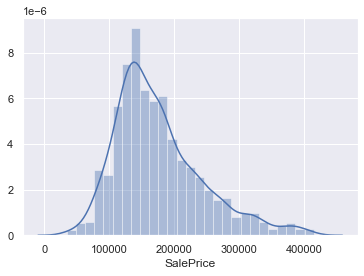

In [335]:
sns.distplot(df_train_o)

In [302]:
print(df_train_o.skew())
print(df_train_o.kurt())

1.0016835845982468
0.9495974475027955


# IQR outlier method

In [307]:
Q1= df_train['SalePrice'].quantile(0.25)
print("Q1 value is:", Q1)
Q3= df_train['SalePrice'].quantile(0.75)
print("Q3 value is:",Q3)

Q1 value is: 129975.0
Q3 value is: 214000.0


In [308]:
IQR= Q3-Q1
IQR

84025.0

In [317]:
df_train_out= df_train[ ~((df_train["SalePrice"] < (Q1 - 1.5 *IQR))| (df_train["SalePrice"] > (Q3 + 1.5 *IQR)))]
df_train_out.shape

(1399, 81)

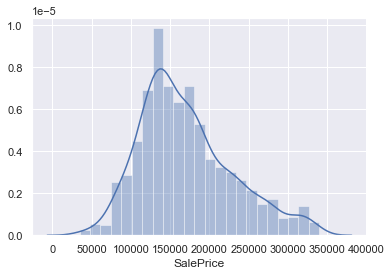

In [336]:
sns.distplot(df_train_out["SalePrice"])

In [337]:
df_train_out["SalePrice"].skew()

0.6797386630838265

In [338]:
df_train_out["SalePrice"].kurt()

0.09092713602572067

In [339]:
print("skewness with outliers:", df_train["SalePrice"].skew())
print("skewness after zscore:", df_train_o.skew())
print("skewness after IQR:", df_train_out["SalePrice"].skew())


print("kurtoisis with outliers:", df_train["SalePrice"].kurt())
print("kurtoisis after zscore:", df_train_o.kurt())
print("kurtoisis after IQR:", df_train_out["SalePrice"].kurt())

skewness with outliers: 1.8828757597682129
skewness after zscore: 1.0016835845982468
skewness after IQR: 0.6797386630838265
kurtoisis with outliers: 6.536281860064529
kurtoisis after zscore: 0.9495974475027955
kurtoisis after IQR: 0.09092713602572067


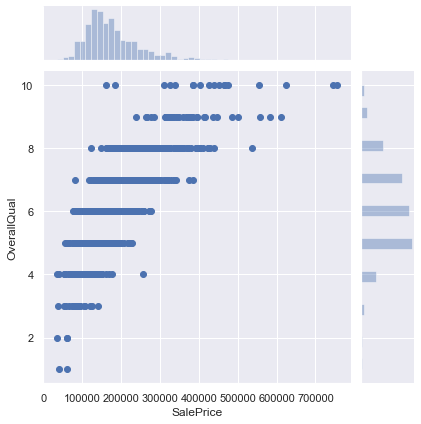

In [340]:
sns.jointplot(df_train["SalePrice"],df_train["OverallQual"])

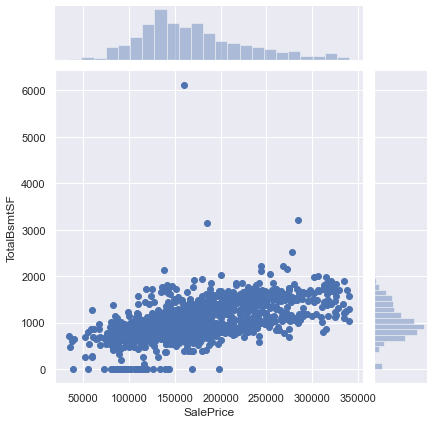

In [341]:
sns.jointplot(df_train_out["SalePrice"],df_train_out["TotalBsmtSF"])

#### Let us do some bivariate analysis to see which variables might be good for predicting sales price
#### box plot overallqual/saleprice

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### Correlation Matrix

In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

#### Scatter Plot

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
corr=df_train.corr()["SalePrice"]
corr

### Some data transformations
### Histogram and Normal Probability Plot

In [ ]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

#### Applying log transformation

In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

#### Histogram and Normal Probability Plot

In [ ]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [ ]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

#### How about missing values

In [ ]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

### Multivariate Analysis

In [342]:
df_train['LotFrontage'].corr(df_train['LotArea'])

0.42609501877180816

In [ ]:
df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
df_train['LotFrontage'].corr(df_train['SqrtLotArea'])

In [ ]:
sns.jointplot(df_train['LotFrontage'],df_train['SqrtLotArea'],color='gold');

In [ ]:
plt.scatter(df_train["MasVnrArea"],df_train["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

#### Basement Variable

In [ ]:
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotalBsmtSF");

#### Treatment of outliers
#### There are few outliers in total basement area; lets remove them

In [ ]:
upperlimit = np.percentile(df_train.TotalBsmtSF.values, 99.5)
df_train['TotalBsmtSF'].ix[df_train['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(df_train.TotalBsmtSF, df_train["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

#### Dealing with categorical variables

In [ ]:
sns.factorplot("Fireplaces","SalePrice",data=df_train,hue="FireplaceQu");

#### Does amount of 1st floor area help in sales price prediction?

In [ ]:
plt.scatter(df_train["1stFlrSF"],df_train.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

#### Create a new variables - sales price per sq ft

In [ ]:
df_train['SalePriceSF'] = df_train['SalePrice']/df_train['GrLivArea']
plt.hist(df_train['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');